# Описание проекта.

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Задача:**<br>
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

Данные за 2016 год могут быть неполными.

<h1>Предобработка данных.<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Планирование рекламной кампании на 2017 год интернет-магазина компьютерных игр.**

Выявление закономерностей, определяющих успешность игры.

**1. Открываем файл и изучаем общую инофрмацию.**

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/datasets/games.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.duplicated().sum()

0

**2. Предобработка данных**

2.1. Изменим регистр названий стобцов.

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


================================================================================================

2.2. Проверим тип данных в таблице.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Не совсем верный тип данных указан в столбце "Год выпуска" ("year_of_release"). Дробные числа стоят здесь, скорее всего, из-за пропусков.

In [10]:
data["year_of_release"].isna().sum()

269

Так и есть. Из-за значения "NaN" стоят дробные числа. Без удаления пропусков изменить тип данных не получится. Учитывая то, что в данном стоблце их, примерно, 1,6% и для более корректного отображения данных, удалим эти пропуски и изменим тип. Просто оставить эти значения пустыми нельзя, т.к. они могут повлиять на результат и зменить каким-то другим значением тоже. Сами же пропуски возникли или вследствие того, что год выпуска просто забыли указать, или из-за какой-то технической ошибки.

In [11]:
data = data.dropna(subset = ["year_of_release"])

In [12]:
data["year_of_release"] = data["year_of_release"].astype(int)

In [13]:
data["year_of_release"].isna().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [15]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Исправлено.

Также неверный тип данный стоит в столбце "Оценка пользователей" ("user_score").

In [16]:
data["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Неверный тип данных появился из-за значения "tbd". Он означает, что значение здесь не определено. Можно удалить эту строку, но, чтобы не терять данные, заменим его на "NaN".

In [17]:
data["user_score"] = pd.to_numeric(data["user_score"], errors = "coerce")

In [18]:
data["user_score"].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Тип данных исправлен.

================================================================================================

2.3. Проверим пропуски.

In [20]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Пропуски в стобцах "Название игры" ("name") и "Жанр" ("genre") можно удалить, т.к. корректным занчением их не заменишь.

In [21]:
data = data.dropna(subset = ["name"])
data = data.dropna(subset = ["genre"])

In [22]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропуски в столбцах "Оценка критиков" ("critic_score"), "Оценка игроков" ("user_score") и "Рейтинг" ("rating") скорее всего объясняются тем, что у этих игр просто нет оценки или рейтинга. Или эти игры давние и у них нет этих оценок (либо они неизвестны). Возможен также вариант, что игры новые и оценки (как и рейтинга) у них ещё нет. Что касается самих пропусков, то они составляют половину значений в этих столбцах и удалить их не представляется возможным. Кроме того, это конкретное категориальное значение, которое выставляется каждой конкретной игре. Любое другое произвольное расчётное значение, будь то средняя оценка или медианная, будет неточным и приведёт к искажению результата. Замена их каким-то другим значением, например "Отсутвует" приведёт к тому, что изменится тип данных в столбце, а для дальнейшего анализа нам потребуются числовые значения, поэтому заменить их таким образом можно только в столбце "Рейтинг", а в столбцах с оценками лучше оставить как есть.

In [23]:
data["rating"] = data["rating"].fillna("Не указан")

In [24]:
data["rating"].unique()

array(['E', 'Не указан', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [25]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [26]:
data = data.reset_index(drop=True)

Пропуски обработаны.

================================================================================================

2.3. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [27]:
data["all_sales"] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [28]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Не указан,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Не указан,31.38


Стобец добавлен.

In [115]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

**3. Исследовательский анализ данных.**

3.1. Посчитаем сколько игр выпускалось в разные годы.

Посчитаем сколько игр вышло в разные годы на всех платформах.

In [30]:
games_all_platform = data.groupby(["year_of_release"])["name"].count()
games_all_platform.head(30)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
Name: name, dtype: int64

<AxesSubplot:title={'center':'Показатели продаж в разные годы на всех платформах'}, xlabel='year_of_release'>

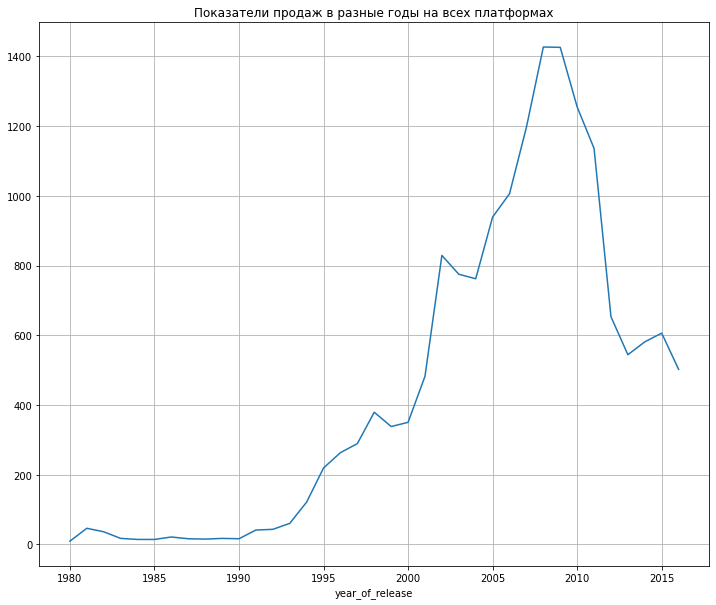

In [31]:
games_all_platform.plot(grid = True, figsize = (12, 10), title = "Показатели продаж в разные годы на всех платформах")

Посчитаем сколько игр вышло в разные годы на разных платформах.

In [32]:
games_on_years = data.groupby(["platform", "year_of_release"])["name"].count()
games_on_years.head(30)

platform  year_of_release
2600      1980                 9
          1981                46
          1982                36
          1983                11
          1984                 1
          1985                 1
          1986                 2
          1987                 6
          1988                 2
          1989                 2
3DO       1994                 1
          1995                 2
3DS       2011               116
          2012                93
          2013                91
          2014                80
          2015                86
          2016                46
DC        1998                 7
          1999                14
          2000                20
          2001                 8
          2002                 1
          2007                 1
          2008                 1
DS        1985                 1
          2004                23
          2005               118
          2006               201
          2007   

In [33]:
platform_all_sales = data.groupby(["platform"])["na_sales", "eu_sales", "jp_sales", "other_sales", "all_sales"].sum().sort_values(by = "all_sales", ascending = False)

In [34]:
platform_all_sales

,na_sales,eu_sales,jp_sales,other_sales,all_sales
platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.56
X360,595.74,268.32,12.30,84.88,961.24
PS3,390.13,327.21,79.41,134.59,931.34
Wii,486.87,258.32,68.28,77.71,891.18
DS,380.31,188.41,175.02,59.04,802.78
PS,334.72,212.39,139.78,40.69,727.58
PS4,108.74,141.09,15.96,48.35,314.14
GBA,184.12,74.59,46.56,7.61,312.88
PSP,107.27,65.62,75.88,40.76,289.53


<AxesSubplot:ylabel='all_sales'>

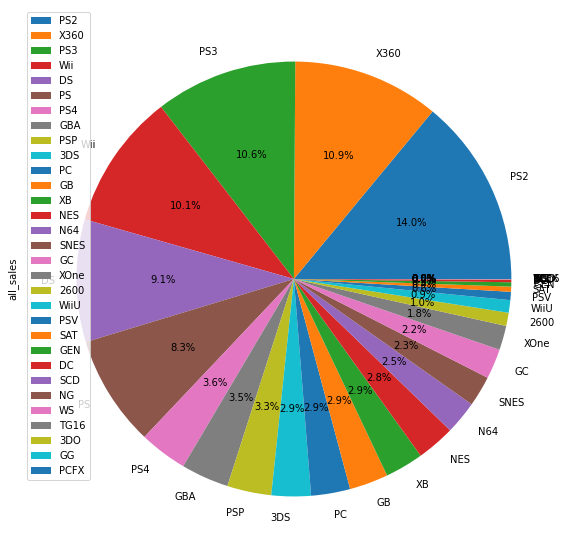

In [35]:
platform_all_sales.plot(y = "all_sales", kind = "pie", autopct = "%1.1f%%", figsize = (12, 10))

В таблице сильно выделяются несколько платформ, чьи продажи превышают 80 млн. После это отсечки, показатели резко снижаются. Отберём только те, чьи показатели выше 80 млн. и пострим по ним график.

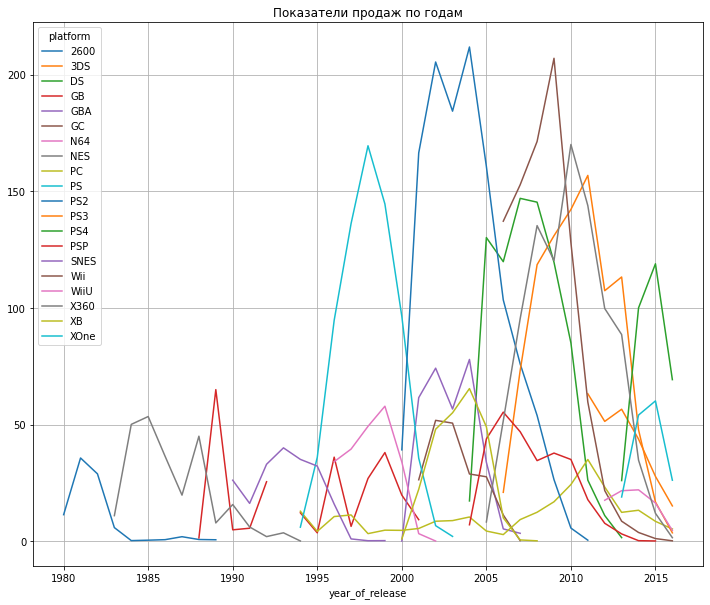

In [36]:
platform_all_years = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS", "PC", "GB", "XB", "NES", "N64", "SNES", "GC", "XOne", "2600", "WiiU"]').pivot_table(
    index = "year_of_release",
    columns = "platform",
    values = "all_sales",
    aggfunc = "sum").plot(grid = True, figsize = (12, 10), title = "Показатели продаж по годам")

Как видно, пик продаж наиболее популярных платформ, приходится на период с 1996 г. по 2010 г. Далее начинется снижение. В 2015 году снова был подъём продаж у двух плтаформ - "PS4" с "XOne" (более подробно этот период будут рассмотрен ниже). У всех остальных платформ продолжался спад. Данные соответствуют графику продаж в разные годы на всех платформах.

Поскольку мы планируем кампанию на 2017 год, то нет необходимости брать игры, которые издавались в 80-ые или 90-ые годы. Возьмём данные за три последних года, а именно - за 2014, 2015 и 2016 годы.

In [37]:
games_to_years = data.query("year_of_release >= 2014 and year_of_release < 2017").groupby("year_of_release")["name"].count()

In [38]:
games_to_years

year_of_release
2014    581
2015    606
2016    502
Name: name, dtype: int64

Для наглядности построим график.

<AxesSubplot:xlabel='year_of_release'>

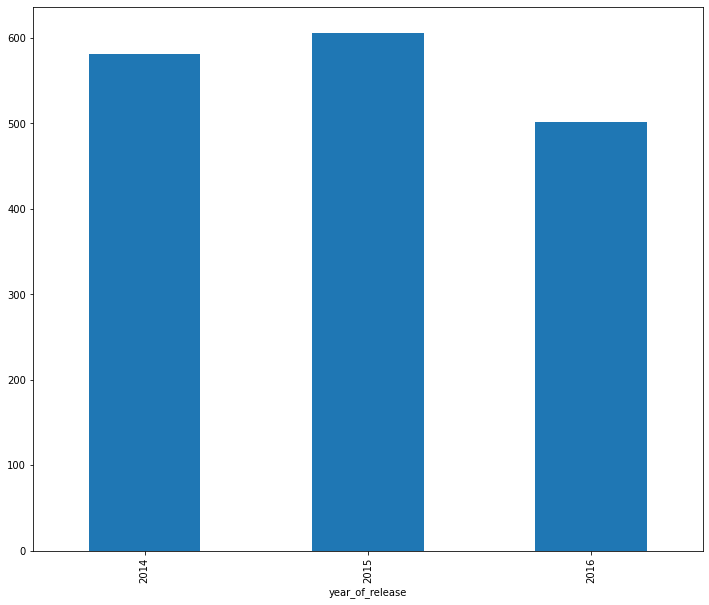

In [39]:
games_to_years.plot(x = "year_of_release", y = "name", kind = "bar", figsize = (12, 10))

Как видно из графика, игры выпускались, примерно, на одном уровне с тенденцией к росту. Снижение в 2016 году связано, скорее всего, с тем, что данные за этот год не полные.

===============================================================================================

3.2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Годы возьмём те же.

In [40]:
platform_sales = data.query("year_of_release >= 2014 and year_of_release < 2017")

In [41]:
platform_sales_10 = platform_sales.groupby("platform")["all_sales"].agg("sum").sort_values(ascending = False).head(10)

In [42]:
platform_sales_10

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: all_sales, dtype: float64

<AxesSubplot:ylabel='all_sales'>

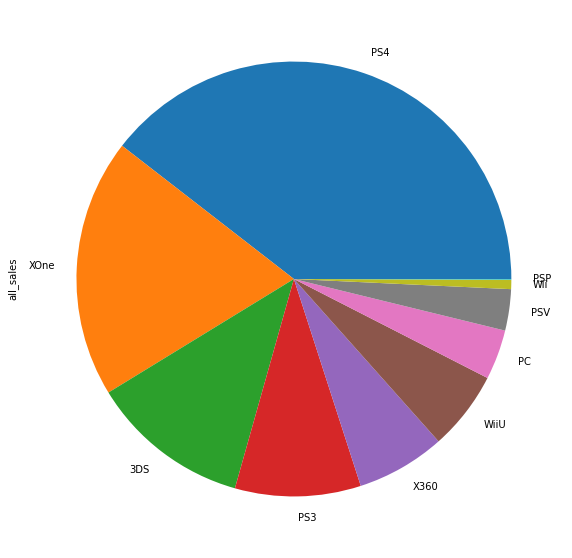

In [43]:
platform_sales_10.plot(y = "all_sales", kind = "pie", figsize = (12, 10))

Построим график. Для удобства, переведём значения в столбце "Год выпуска" в строки.

In [44]:
platform_sales1 = platform_sales

In [45]:
platform_sales1["year_of_release"] = platform_sales1["year_of_release"].astype(str)

<AxesSubplot:title={'center':'Показатели продаж за отчётный период'}, xlabel='year_of_release'>

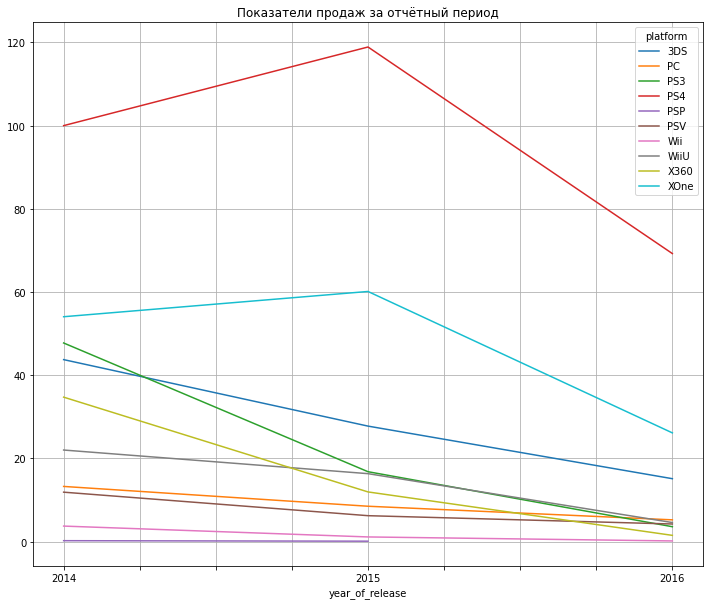

In [46]:
platform_sales1.pivot_table(
    index = "year_of_release",
    columns = "platform",
    values = "all_sales",
    aggfunc = "sum").plot(grid = True, figsize = (12, 10), title = "Показатели продаж за отчётный период")

================================================================================================

3.3. Для анализа в качестве актуального выбран период с 2014 г. по 2016 г. включительно. Поскольку нам нужно построить прогноз на 2017 г., то нет нужды брать данные 10-летней или 20-летней давности, достаточно взять показатели за три предыдущих года.

================================================================================================

3.4. Как видно из полученных данных, больше всего продаж приходится на две платформы - это "PS4" и "XOne". И именно эти две платформы демнострировали положительную динамику продаж до 2015 года. У всех остальных продажи падали на протяжении трёх лет.
С 2015 года и у "PS4" с "XOne" также начинается резкий спад. Однако, как и в случае с играми, объясняться это может тем, что данные за 2016 г. не полные. На основании изложенного, с поправкой на возможно неполные данные 2016 г., можно сделать вывод, что наиболее перспективными и прибыльными являются указанные две платформы (особенно это касается "PS4").

================================================================================================

3.5. Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам. 

(0.0, 8.0)

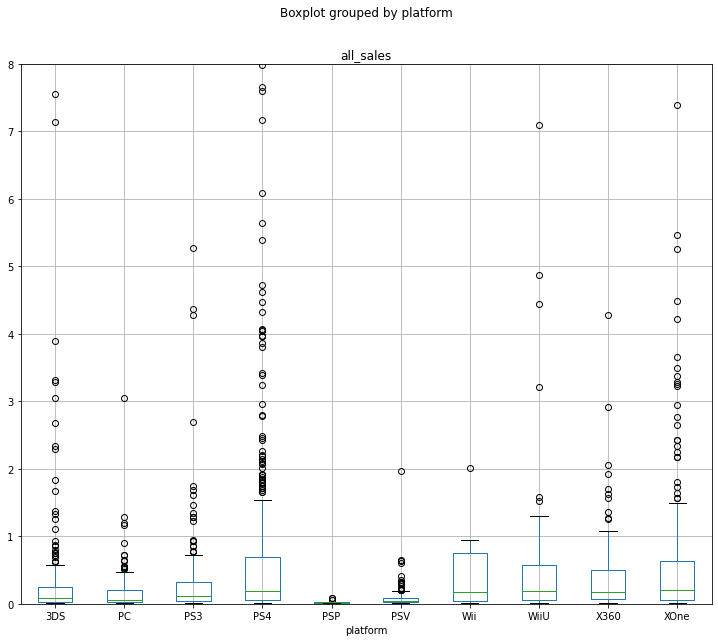

In [47]:
platform_sales.boxplot(column = "all_sales", by = "platform", figsize = (12, 10))
plt.ylim(0, 8)

(0.0, 3.0)

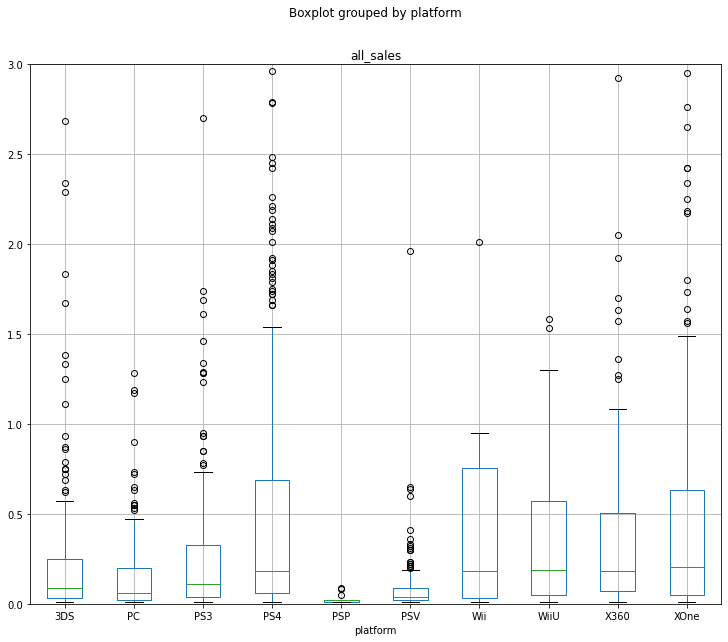

In [48]:
platform_sales.boxplot(column = "all_sales", by = "platform", figsize = (12, 10))
plt.ylim(0, 3)

In [49]:
platform_sales.groupby("platform")["all_sales"].describe().sort_values(by = "mean", ascending = False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96


Диаграмма характеризуется неоднородностью и смещением к выскоим значениям. Кроме этого наблюдается большое количество выбросов. Как и на других графиках, преобладают данные платформ "PS4" и "XOne". Именно у них средние показатели выше всего. При этом, у "PS4" наблюдается довольно большой разброс значений. Учитывая, что у этой платформы больше всего данных, можно предположить, что это связанно с большим количеством выпускаемых игр и неоднородностью в продажах, когда некоторые игры могли показать отличный результат, а другие гораздо более низкий.

Также отметить, что на диаграмме размаха явно выделяются пять платформ, с самыми большими показателями. При этом медиана у всех находится, примерно, на одном уровне и не превышает 200-300 тыс. Об этом будет написано ниже.

================================================================================================

3.6. Исследуем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

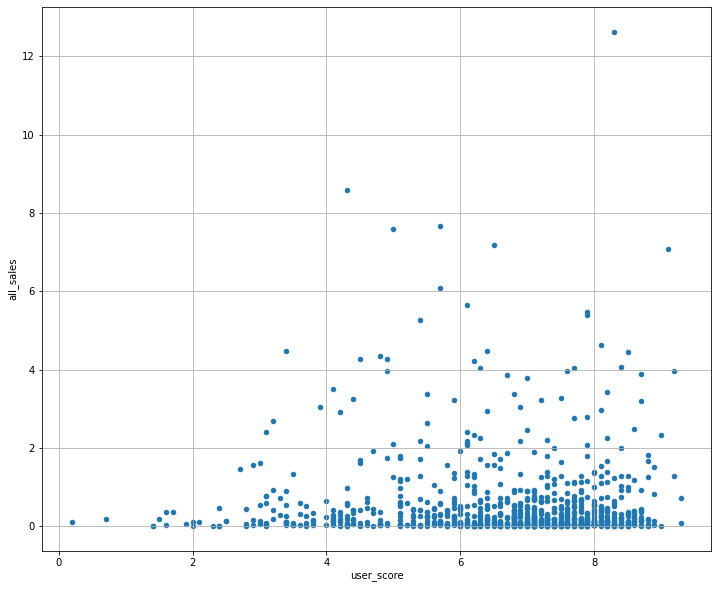

In [50]:
platform_sales.plot(x = "user_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10))

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

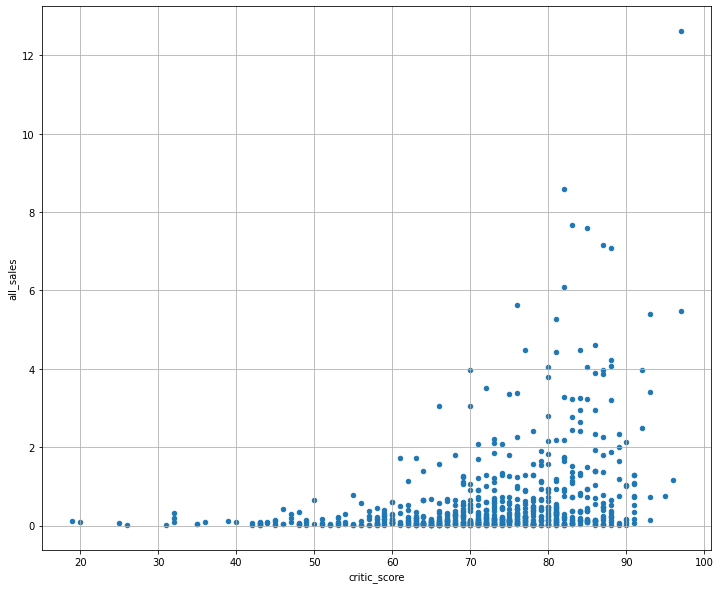

In [51]:
platform_sales.plot(x = "critic_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10))

Отберём пять наиболее популярных платформ.

In [52]:
platform_sales_5 = data.query('platform == ["PS4", "XOne", "WiiU", "Wii", "X360"]')

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

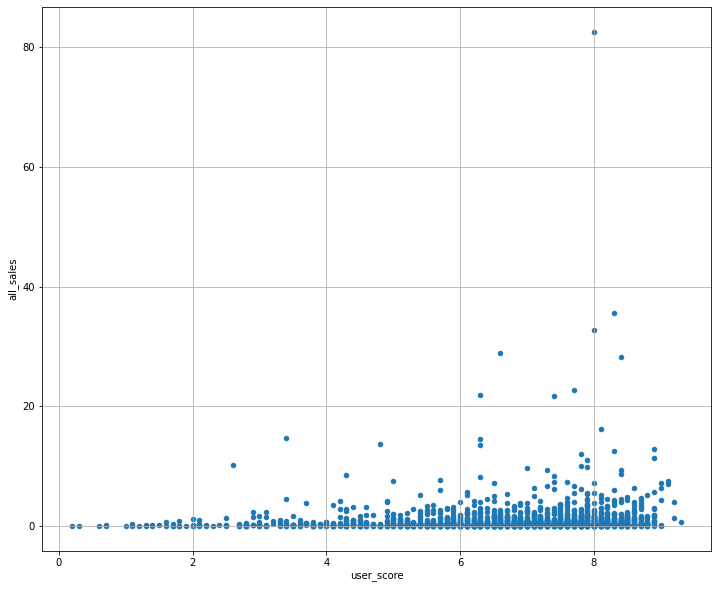

In [53]:
platform_sales_5.plot(x = "user_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10))

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

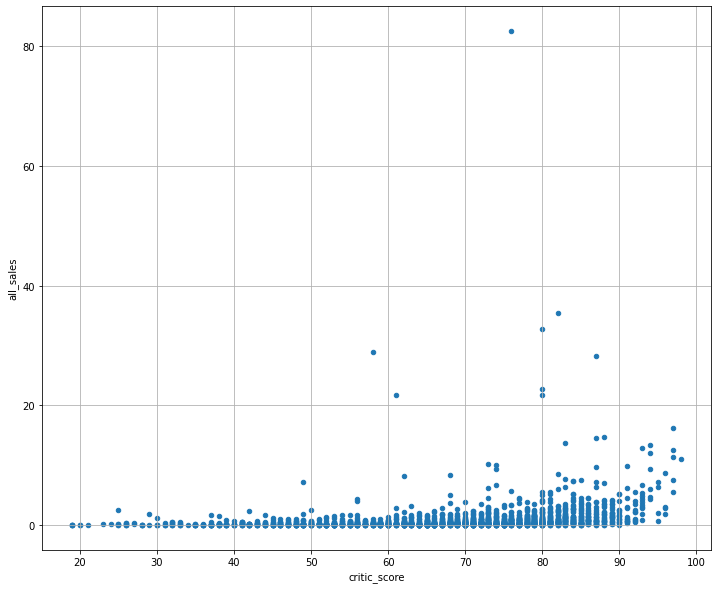

In [54]:
platform_sales_5.plot(x = "critic_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10))

Диаграммы, в общем, схожа с показателями по всем платформам. Если судить по ним, то влияние оценок на продажи очень незначительное.

In [55]:
platform_sales_5["user_score"].corr(platform_sales_5["all_sales"])

0.09390145441495755

In [56]:
platform_sales_5["critic_score"].corr(platform_sales_5["all_sales"])

0.22788804788515515

Как видно из полученных данных, соотношение между продажами и оценками игроков или критиков очень небольшое.

Возьмём наиболее популярную платформу "PS4". Период возьмём тот же: с 2014 г. по 2016 г. включительно.

Построим диаграмму по оценкам пользователей.

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

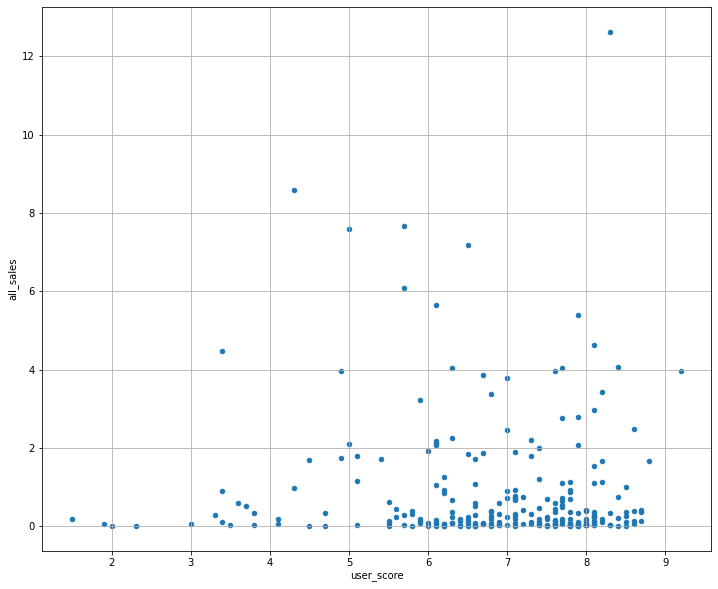

In [57]:
platform_sales[platform_sales["platform"] == "PS4"].plot(x = "user_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10))

Тенденция очевидна - чем выше оценка пользователей, тем выше продажи.

Построим диаграмму по оценкам критиков.

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

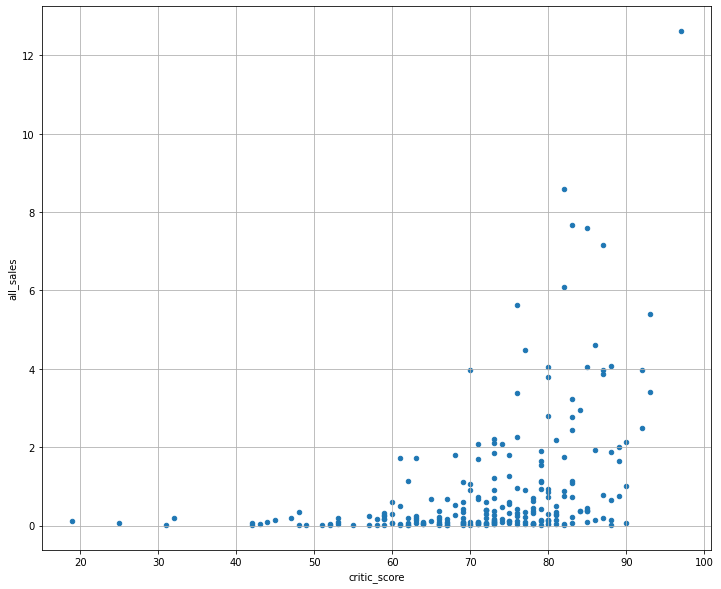

In [58]:
platform_sales[platform_sales["platform"] == "PS4"].plot(x = "critic_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10))

Тенденция та же, причём гораздо более выраженная. Если показатели по оценкам пользователей более рассеяны, то по оценкам критиков более сгруппированы и смещены вправо.

В целом, графики влияния оценок по всем платформам соотносится с графиком оценок по одной популярной плафторме. Показатели на них схожи.

In [59]:
platform_sales_PS4 = platform_sales[platform_sales["platform"] == "PS4"]

In [60]:
platform_sales_PS4["user_score"].corr(platform_sales_PS4["all_sales"])

-0.040131589472697356

Корреляция отрицательная, но не сильно.

In [61]:
platform_sales_PS4["critic_score"].corr(platform_sales_PS4["all_sales"])

0.40266141068104083

Корреляция положительная, но также не сильно выраженная.

Построим такую же диаграмму и для других четырёх поппулярных платформ, а именно, для "XOne", "WiiU", "Wii", "X360". Возьмём исследуемый период.

Вляние оценок игроков.

<AxesSubplot:title={'center':'Платформа X360'}, xlabel='user_score', ylabel='all_sales'>

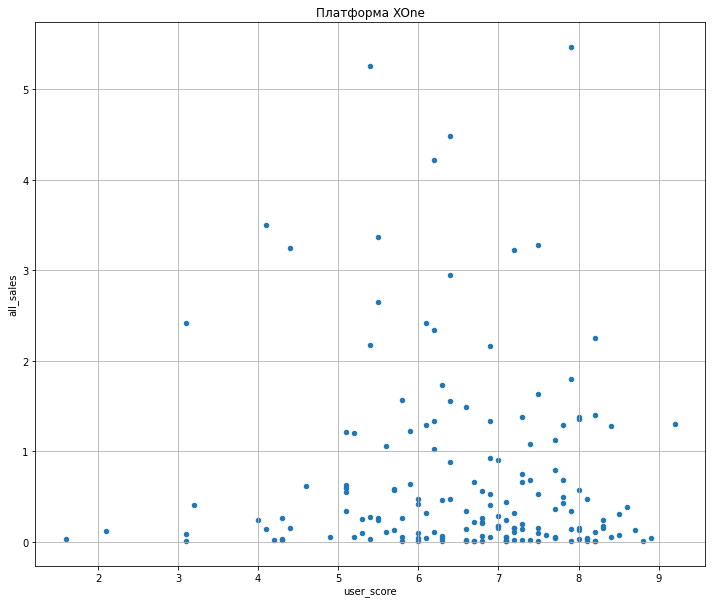

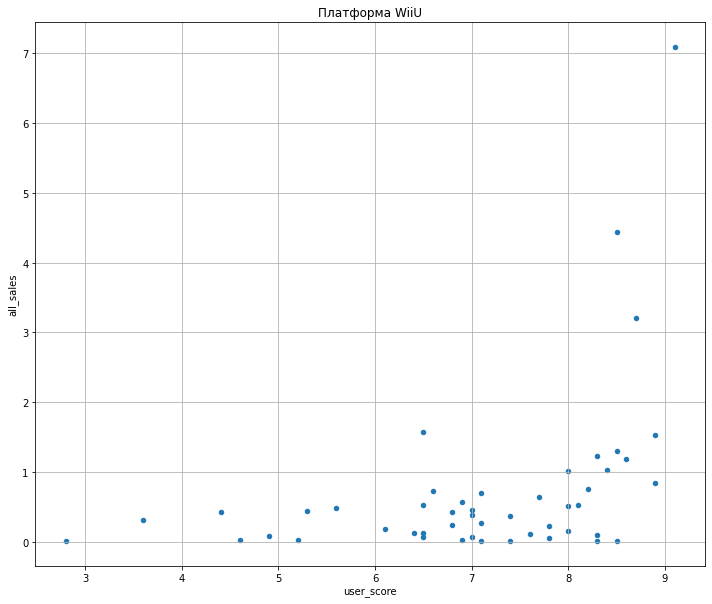

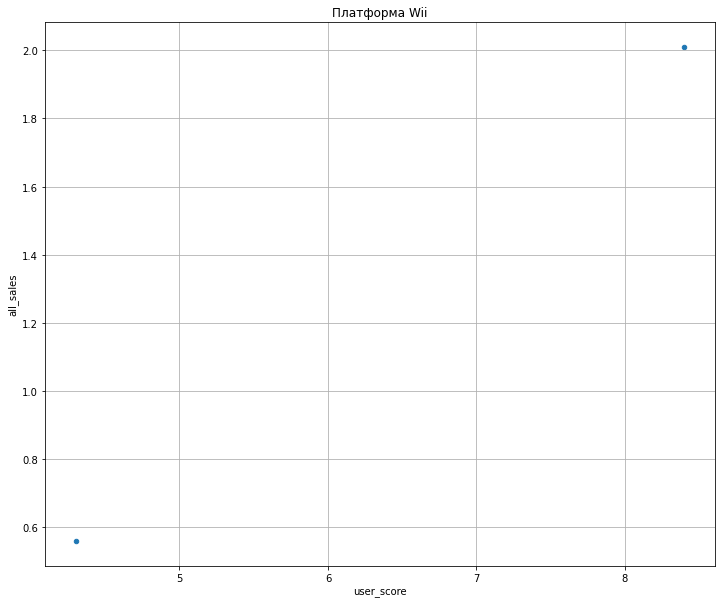

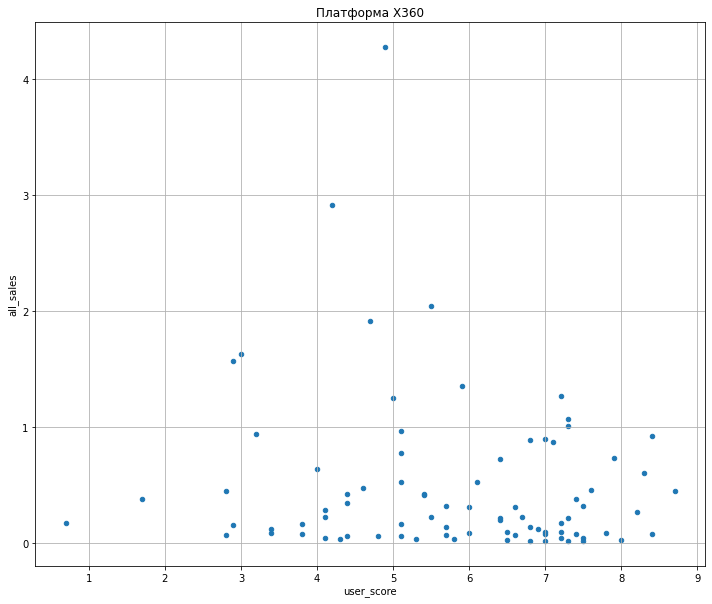

In [62]:
platform_sales[platform_sales["platform"] == "XOne"].plot(x = "user_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10), title = "Платформа XOne")
platform_sales[platform_sales["platform"] == "WiiU"].plot(x = "user_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10), title = "Платформа WiiU")
platform_sales[platform_sales["platform"] == "Wii"].plot(x = "user_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10), title = "Платформа Wii")
platform_sales[platform_sales["platform"] == "X360"].plot(x = "user_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10),title = "Платформа X360" )

Как видно из графиков, по 1, 2 и 4 платформам есть некотрое влияние отзывов на продажи. При этом, на 1 и 4 графиках данные в общем схожи и характеризуются большим разбросом с той разницей, что по первой платформе данных гораздо больше. На 2 графике данные сильнее смещены вправо, что говорит о том, что для платформы "WiiU" влияние оценок игроков на продажи сильнее и даже более выраженное, чем для платформы "PS4". Для платформы "Wii" данные отсутствуют.

Влияние оценок критиков.

<AxesSubplot:title={'center':'Платформа X360'}, xlabel='critic_score', ylabel='all_sales'>

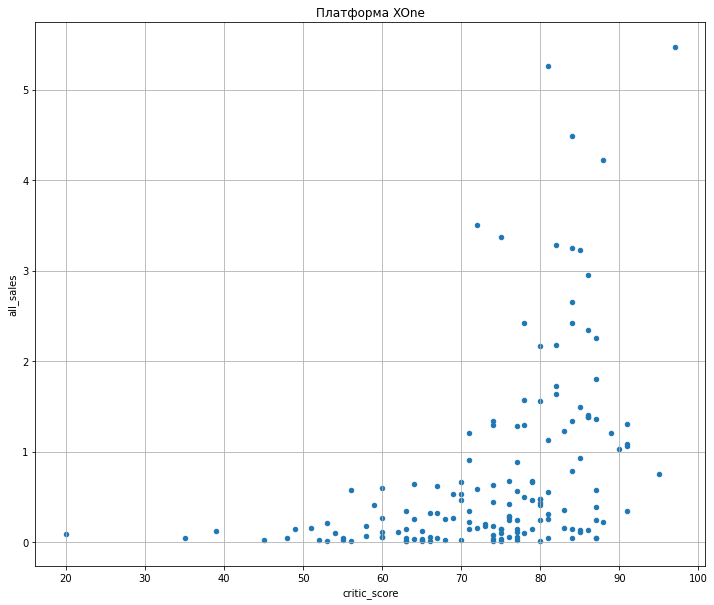

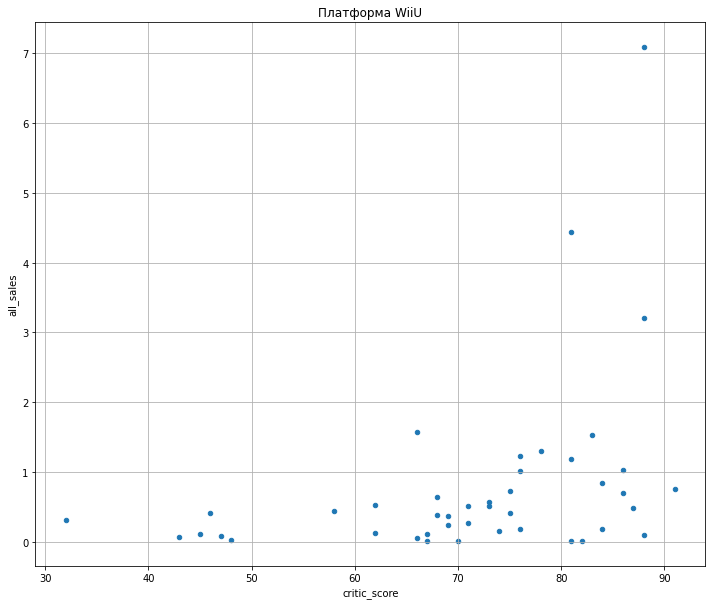

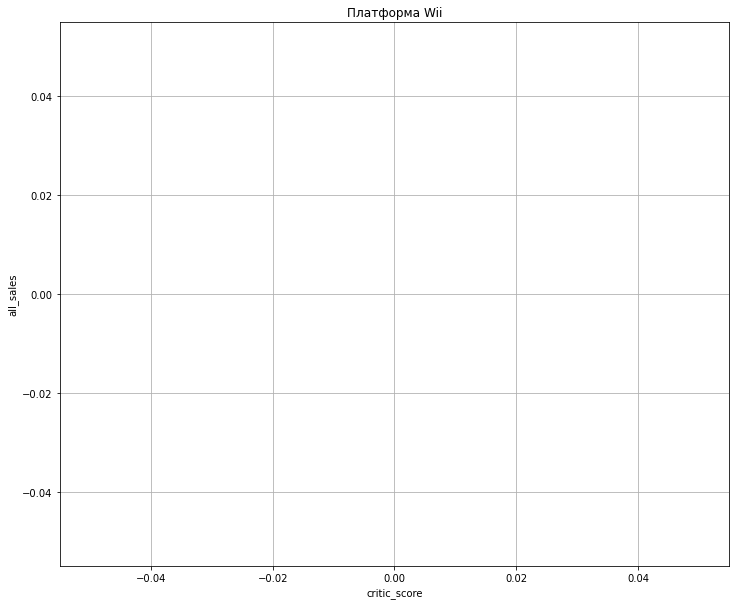

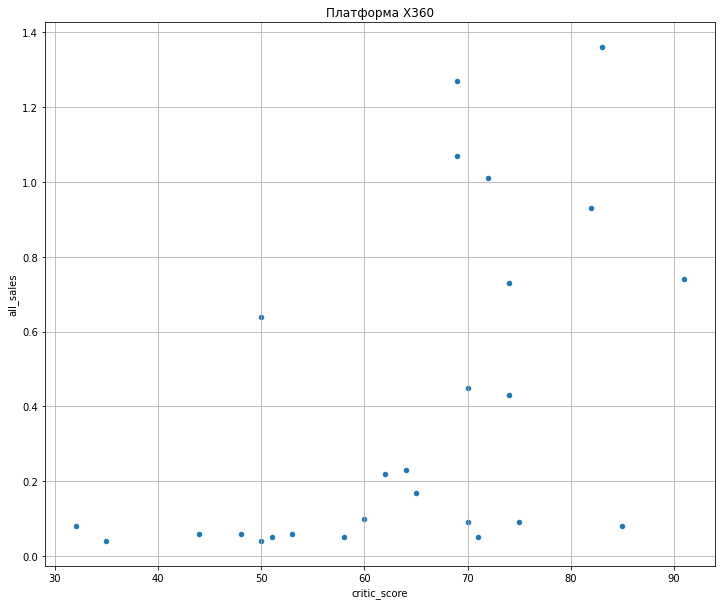

In [63]:
platform_sales[platform_sales["platform"] == "XOne"].plot(x = "critic_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10), title = "Платформа XOne")
platform_sales[platform_sales["platform"] == "WiiU"].plot(x = "critic_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10), title = "Платформа WiiU")
platform_sales[platform_sales["platform"] == "Wii"].plot(x = "critic_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10), title = "Платформа Wii")
platform_sales[platform_sales["platform"] == "X360"].plot(x = "critic_score", y = "all_sales", kind = "scatter", grid = True, figsize = (12, 10),title = "Платформа X360" )

Здесь показатели, в целом, идентичны общим по всем платформам и показателям для платформы "PS4". Везде присутствует заметное смещение вправо, что говорит о большем влиянии оценок критиков, чем оценок игроков. Плотность данных, примерно, такое же, как и для оценок игроков с той разницей, что у платформы "XOne" их гораздо больше, чем у других.

Данные диаграммы подтверждают ранее сделанный вывод о лидерстве платформ "PS4" и "XOne". По ним больше всего данных и именно у них гораздо более выраженное влияние оценок критиков и игроков на продажи.

Дополнительно посмотрим корреляцию по данным 4 платформам.

In [64]:
platform_sales_4 = data.query('platform == ["XOne", "WiiU", "Wii", "X360"]')

In [65]:
platform_sales_4["user_score"].corr(platform_sales_4["all_sales"])

0.10439693744254647

In [66]:
platform_sales_4["critic_score"].corr(platform_sales_4["all_sales"])

0.2194319701595206

Корреляция здесь также слабо выражена. Показатели соответствую аналогичным для ведущей платформы "PS4".

In [67]:
platform_sales_XOne = platform_sales[platform_sales["platform"] == "XOne"]
platform_sales_WiiU = platform_sales[platform_sales["platform"] == "WiiU"]
platform_sales_Wii = platform_sales[platform_sales["platform"] == "Wii"]
platform_sales_X360= platform_sales[platform_sales["platform"] == "X360"]

Платформа "XOne".

In [68]:
platform_sales_XOne["user_score"].corr(platform_sales_XOne["all_sales"])

-0.0703839280647581

In [69]:
platform_sales_XOne["critic_score"].corr(platform_sales_XOne["all_sales"])

0.42867694370333226

Платформа "WiiU".

In [70]:
platform_sales_WiiU["user_score"].corr(platform_sales_WiiU["all_sales"])

0.40792645792170773

In [71]:
platform_sales_WiiU["critic_score"].corr(platform_sales_WiiU["all_sales"])

0.370201412480884

Платформа "Wii".

In [72]:
platform_sales_Wii["user_score"].corr(platform_sales_Wii["all_sales"])

1.0

In [73]:
platform_sales_Wii["critic_score"].corr(platform_sales_Wii["all_sales"])

nan

Платформа "X360".

In [74]:
platform_sales_X360["user_score"].corr(platform_sales_X360["all_sales"])

-0.138444570945665

In [75]:
platform_sales_X360["critic_score"].corr(platform_sales_X360["all_sales"])

0.5257228356581523

Как и в расчёте по всем платформам, так и по лучшей, здесь корреляция также слабая. Исключение составляет платформа "Wii", где есть полное совпадение с продаж с оценками игроков и отсутствие данных по совпадению с оценками критиков (как и на диаграмме, данные просто отсутствуют). Также чуть выше показателей других платформ соотношение между продажами и оценками критиков у платформу "X360".

В целом можно сделать вывод, корреляция у всех платформ, чьи данные были пранализированны, находится на низком уровне.

На основании полученных данных можно сделать вывод, что диаграмма, в основном, смещена вправо, что означает преобладание высоких оценок. Видна взаимосвязь между оценками и продажами. При этом оценки игроков характеризуются гораздо большим разбросом и рассеянностью, чем оценки критиков. Это логично, критики должны давать более профессиональную и взвешенную оценку, чем игроки. При этом расчёт корреляции показал практически нулевую взаимосвязь между оценками игроков и продажами и близкую к нулю между оценками критиков и количеством продаж. Более выское соотношение между оценками критиками и продажами также вполне логично и по той же причине, что и более собранная диаграмма - критики дают более чёткую и профессиональную оценку, на которую чаще всего и ориентируются игроки. При этом необычно то, что при наличии выраженной взаимосвязи на диаграмме, расчёт корреляции показал близкую у нулю взаимосвязь. Это может объясняться наличием более сложной, чем линейная, взаимосвязи.

================================================================================================

3.7. Соотношение с продажами игр на других платформах.

Ранее мы уже строили графики продаж за период с 2014 г. по 2016 г. Чтобы не повторяться и для наглядности построим за весь период. 

Построим график.

<AxesSubplot:ylabel='platform'>

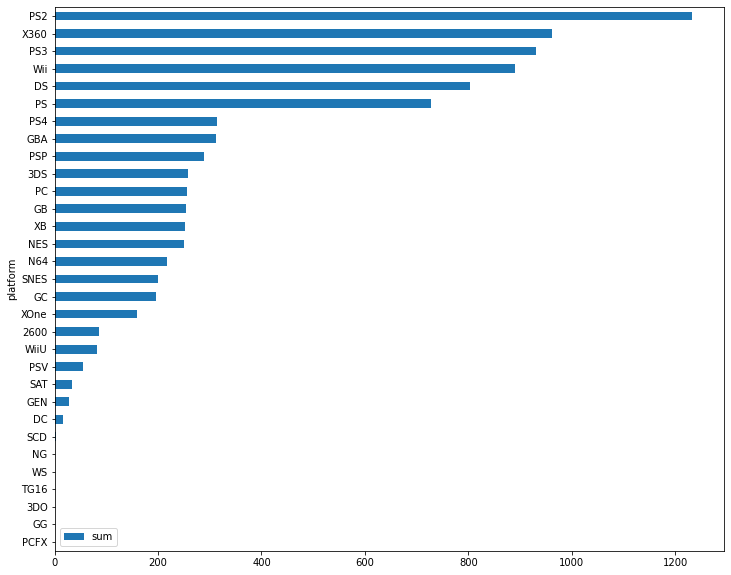

In [76]:
data.groupby("platform")["all_sales"].agg(["sum"]).sort_values(by = "sum").plot(kind = "barh", figsize = (12, 10))

Построим ещё диаграмму размаха.

(0.0, 5.0)

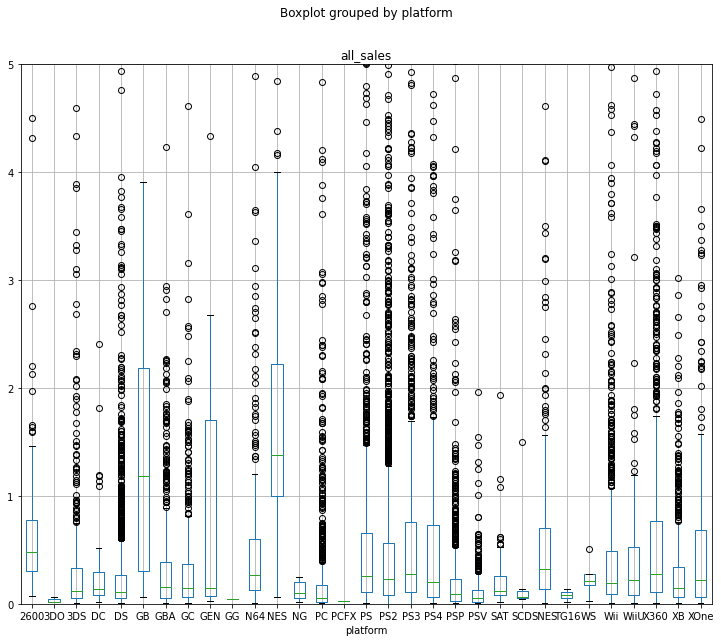

In [77]:
data.boxplot(column = "all_sales", by = "platform", figsize = (12, 10))
plt.ylim(0, 5)

Если брать весь период, то видно, что выделяются 6 ведущих платформ. Остальные значительно отстают. Важный момент - лидер продаж за период 2014 г. - 2016 г. платформа PS4 сильно отстаёт. Сравним с данными за отчётный период.

<AxesSubplot:ylabel='platform'>

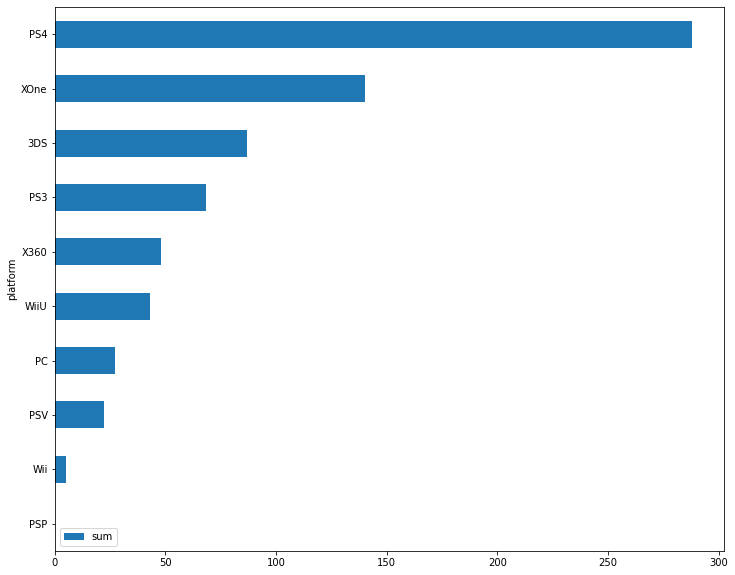

In [78]:
platform_sales.groupby("platform")["all_sales"].agg(["sum"]).sort_values(by = "sum").plot(kind = "barh", figsize = (12, 10))

Для этого периода ранее уже строили диаграмму размаха, повторим ещё раз с чуть меньшим диапазоном.

(0.0, 5.0)

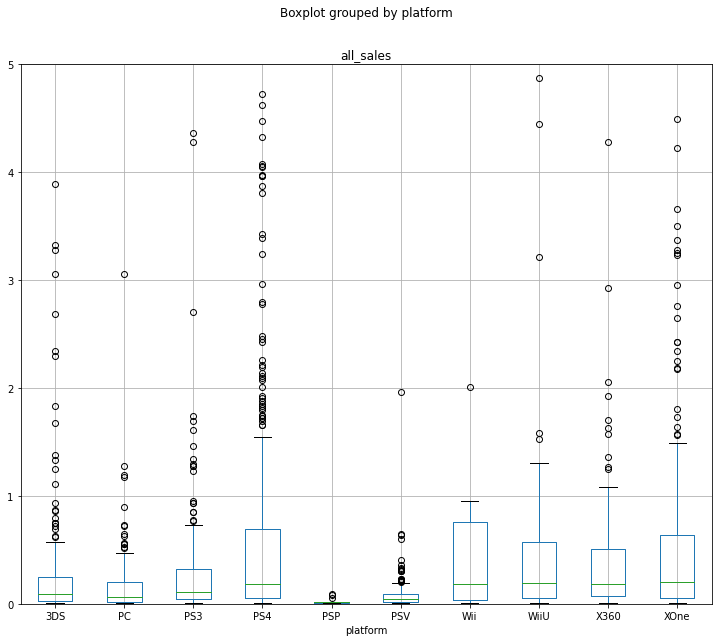

In [79]:
platform_sales.boxplot(column = "all_sales", by = "platform", figsize = (12, 10))
plt.ylim(0, 5)

Данная диаграмма уже описывалась в п. 3.5.

In [80]:
data_10 = data.groupby("platform")["all_sales"].agg("sum").sort_values(ascending = False).head(10)

In [81]:
data_10

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: all_sales, dtype: float64

In [82]:
platform_sales_10

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: all_sales, dtype: float64

In [83]:
platform_sales["platform"].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

In [84]:
platform_sales["platform"].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [85]:
data["platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Как видно из полученных данных, за несколько последних лет соотношение платформ сильно изменилось. Из нескольких десятков, осталось десять. При этом вперёд вышли те платформы, которые в лидерах не были. В отчётный период лидируют две платформы, а именно "PS4" и "XOne". Скорее всего, это произошло потому, что у остальных началось падение продаж и только эти две платформы сохранили стабильность и показали рост, как видно вы разделе 3.2.

Следует также заметить, что медиана продаж на всех платформах почти ни у кого не превышает 500 тыс. А за отчётный период не превышает 200-300 тыс., что также свидетельствует о падении продаж. Но тут нужно будет сделать поправку на то, что данные за 2016 г., возможно, не полные. 

3.8. Общее распределение игр по жанрам.

Возьмём отчётный период (с 2014 г. по 2016 г.).

<AxesSubplot:xlabel='genre'>

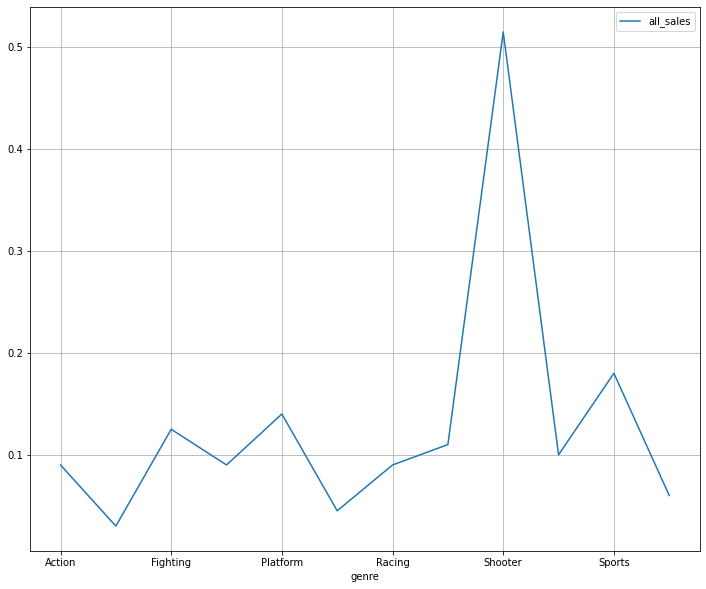

In [86]:
platform_sales.pivot_table(index = "genre", values = "all_sales", aggfunc = "median").plot(grid = True, figsize = (12, 10))

На графике резко выделяется жанр "Shooter", который показывает самые высокие результаты.

Чтобы оценить долю других жанров, построим круговую диаграмму.

<AxesSubplot:ylabel='all_sales'>

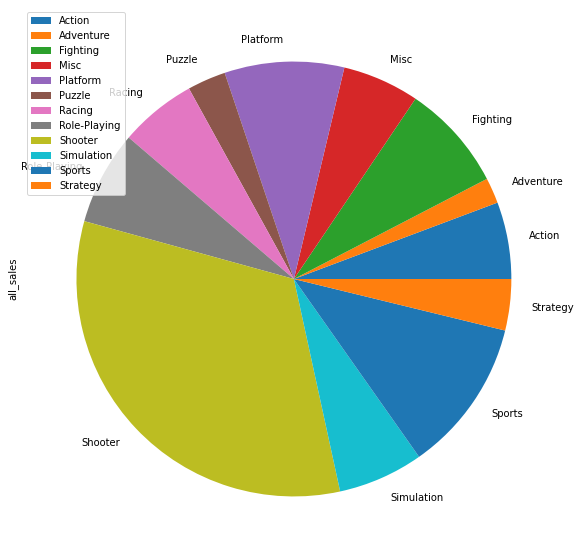

In [87]:
platform_sales.pivot_table(index = "genre", values = "all_sales", aggfunc = "median").plot(y = "all_sales", kind = "pie", figsize = (12, 10))

За исследуемый период, выделяется несколько наиболее популярных жанров. На первом месте с большим отрывом идёт жанр "Shooter", на втором и третьем месте по популярности жанры "Sport" и "Platform". Остальные жанры в целом были равны по популярности. Наименее популярными оказались игры в жанре "Adventure" и "Puzzle".

Добавим диаграмму размаха.

<AxesSubplot:title={'center':'all_sales'}, xlabel='genre'>

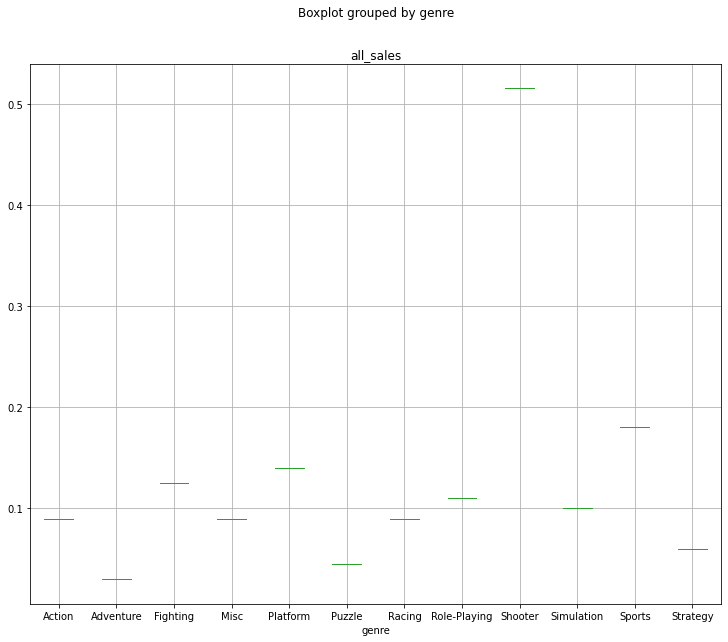

In [88]:
platform_sales.pivot_table(index = "genre", values = "all_sales", aggfunc = "median").boxplot(column = "all_sales", by = "genre", figsize = (12, 10))

На диаграмме видно, что продажи игр всех жанров находятся примерно в одном диапазоне и их медианное значение не превышает 150 тыс. Исключение составляет жанр "Shooter", чьё значение превышает 500 тыс. и  "Sport", чьи продажи находятся около 200 тыс. В целом, эта диаграмма подтверждает предыдущие выводы. Следует, однако, отметить, что высокие показатели жанра "Shooter" могут объясняться какой-то одной игрой, которая показала очень высокие результаты.

**4. Портрет пользователя каждого региона.**

Определим для пользователя каждого региона.

4.1. Самые популярные платформы (топ-5).

In [89]:
platform_na_5 = platform_sales.groupby("platform")["na_sales"].sum().sort_values(ascending = False).head()
platform_eu_5 = platform_sales.groupby("platform")["eu_sales"].sum().sort_values(ascending = False).head()
platform_jp_5 = platform_sales.groupby("platform")["jp_sales"].sum().sort_values(ascending = False).head()
platform_other_5 = platform_sales.groupby("platform")["other_sales"].sum().sort_values(ascending = False).head()

<AxesSubplot:title={'center':'5 самых популярных платформ в Северной Америке'}, xlabel='platform'>

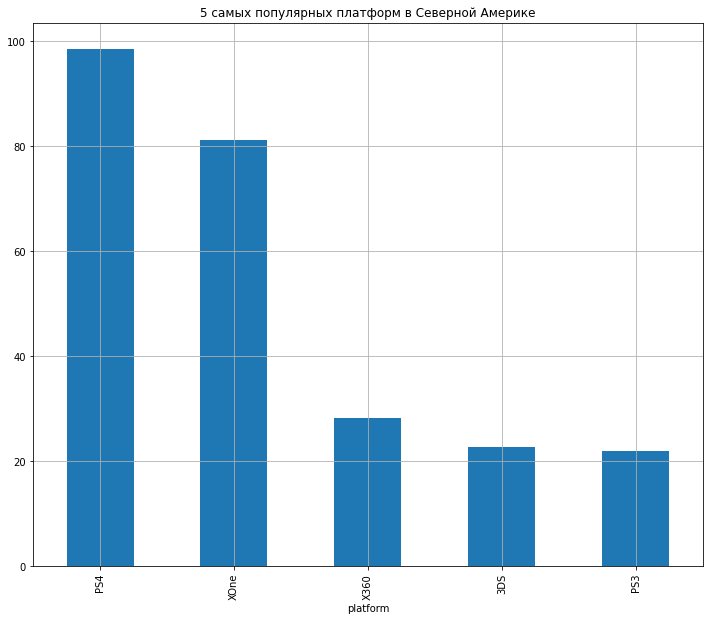

In [90]:
platform_na_5.plot(x = "platform", y = "na_sales", kind = "bar", figsize = (12, 10), grid = True, title = "5 самых популярных платформ в Северной Америке")

<AxesSubplot:title={'center':'5 самых популярных платформ в Европе'}, xlabel='platform'>

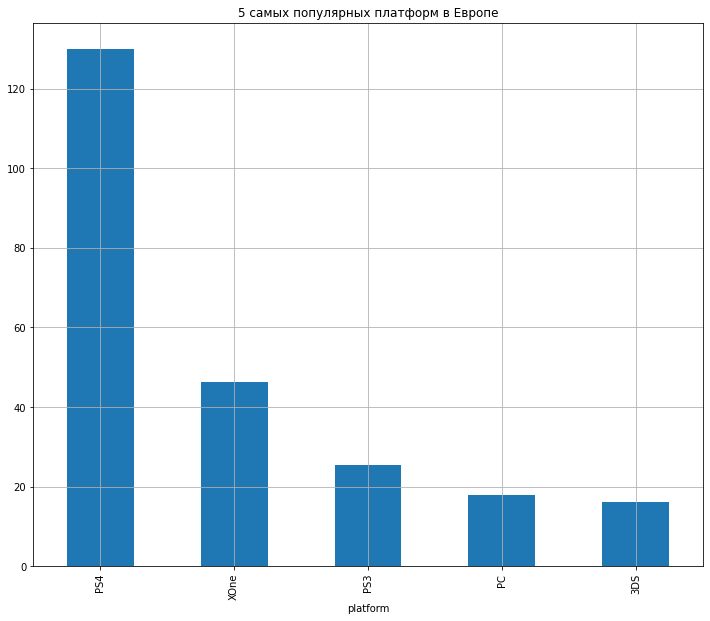

In [91]:
platform_eu_5.plot(x = "platform", y = "eu_sales", kind = "bar", figsize = (12, 10), grid = True, title = "5 самых популярных платформ в Европе")

<AxesSubplot:title={'center':'5 самых популярных платформ в Японии'}, xlabel='platform'>

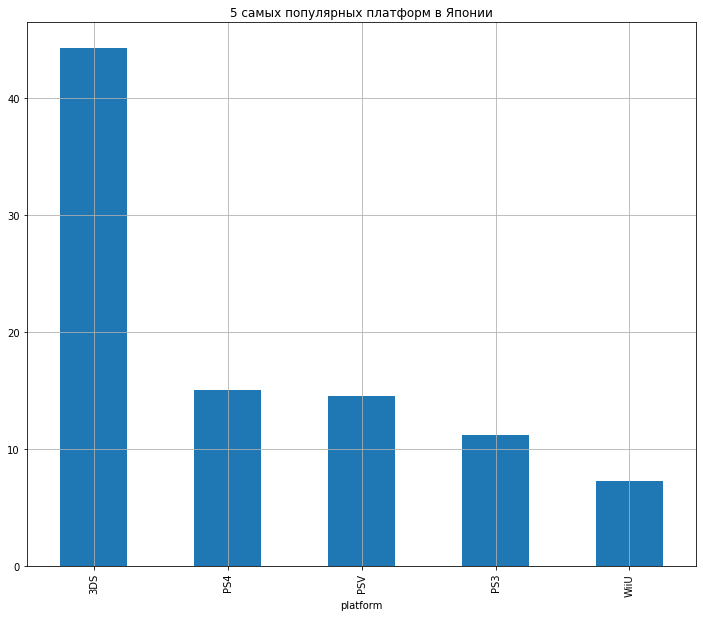

In [92]:
platform_jp_5.plot(x = "platform", y = "jp_sales", kind = "bar", figsize = (12, 10), grid = True, title = "5 самых популярных платформ в Японии")

<AxesSubplot:title={'center':'5 самых популярных платформ в других регионах'}, xlabel='platform'>

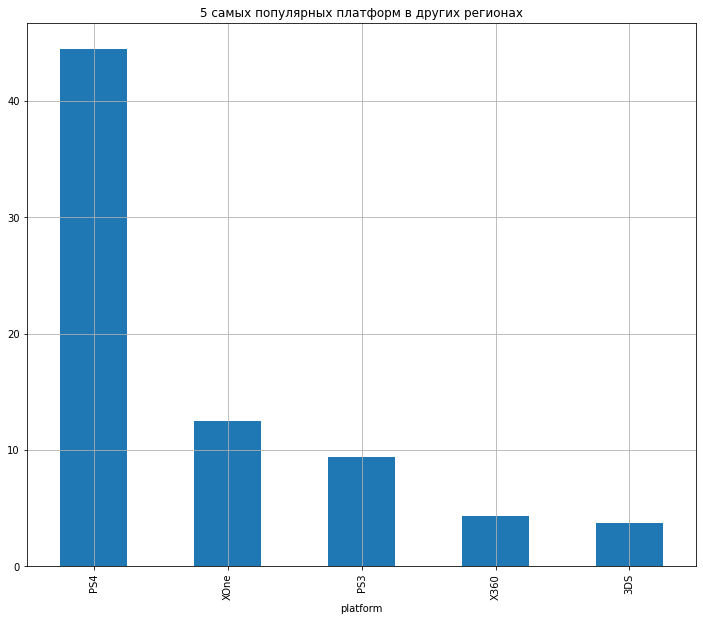

In [93]:
platform_other_5.plot(x = "platform", y = "other_sales", kind = "bar", figsize = (12, 10), grid = True, title = "5 самых популярных платформ в других регионах")

Как видно, из графиков, везде сохраняется лидерство указанных выше платформ ("PS4" и "XOne"), а показатели остальных, в целом соответствуют друг другу во всех регионах. Исключение составляет Япония, где в пять лучших входят другие платформы. Стоит также отметить, что в большинстве регионов (за исключением Северной Америки) "PS4" лидирует с большим отрывом.

================================================================================================

4.2. Самые популярные жанры (топ-5).

In [94]:
best_genres_na = platform_sales.groupby("genre")["na_sales"].sum().sort_values(ascending = False).head()
best_genres_eu = platform_sales.groupby("genre")["eu_sales"].sum().sort_values(ascending = False).head()
best_genres_jp = platform_sales.groupby("genre")["jp_sales"].sum().sort_values(ascending = False).head()
best_genres_other = platform_sales.groupby("genre")["other_sales"].sum().sort_values(ascending = False).head()

Text(0, 0.5, 'Продано экземпляров (млн.)')

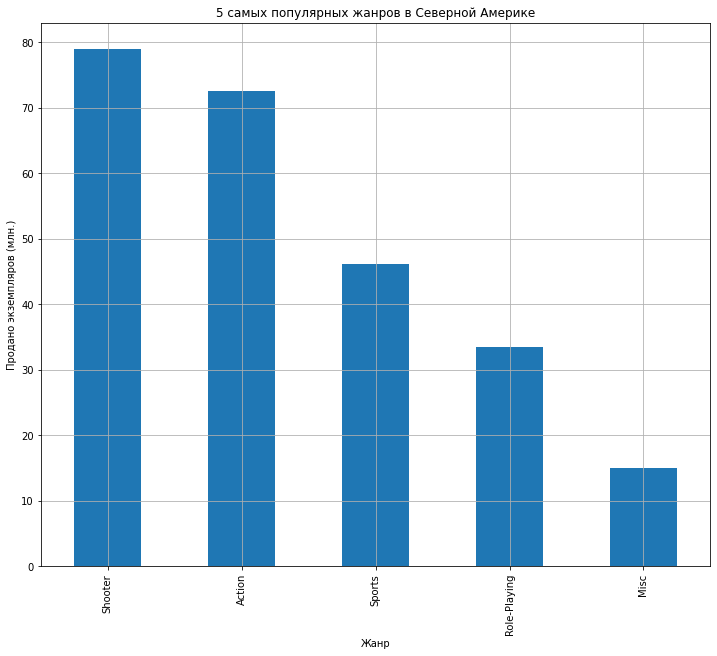

In [95]:
best_genres_na.plot(x = "genre", y = "na_sales", kind = "bar", figsize = (12, 10), grid = True, title = "5 самых популярных жанров в Северной Америке")
plt.xlabel("Жанр")
plt.ylabel("Продано экземпляров (млн.)")

Text(0, 0.5, 'Продано экземпляров (млн.)')

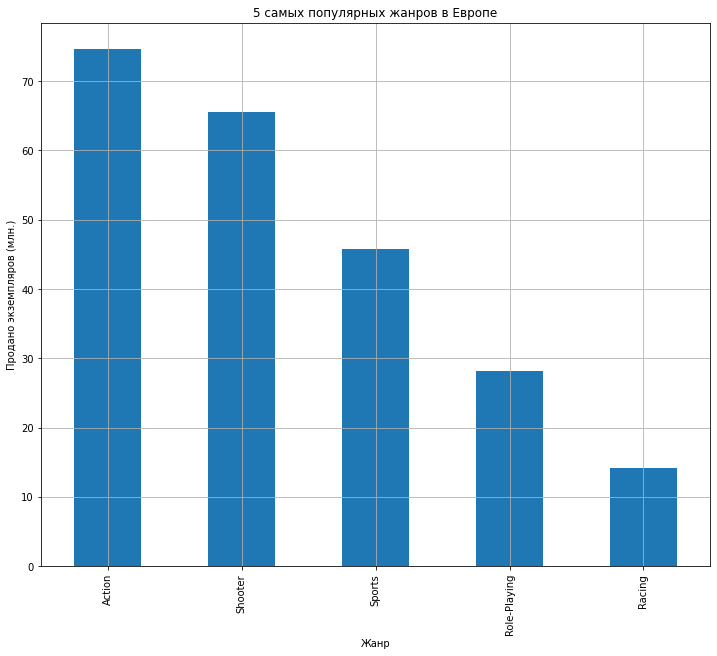

In [96]:
best_genres_eu.plot(x = "genre", y = "eu_sales", kind = "bar", figsize = (12, 10), grid = True, title = "5 самых популярных жанров в Европе")
plt.xlabel("Жанр")
plt.ylabel("Продано экземпляров (млн.)")

Text(0, 0.5, 'Продано экземпляров (млн.)')

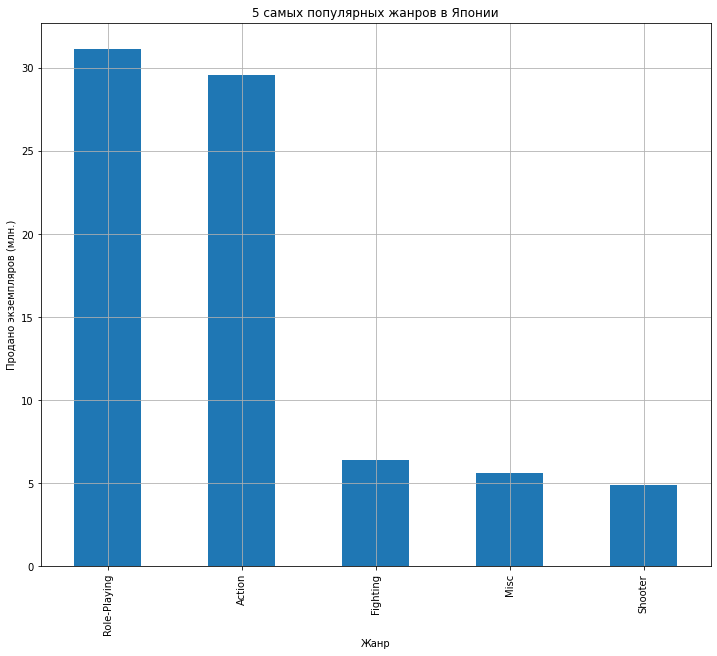

In [97]:
best_genres_jp.plot(x = "genre", y = "jp_sales", kind = "bar", figsize = (12, 10), grid = True, title = "5 самых популярных жанров в Японии")
plt.xlabel("Жанр")
plt.ylabel("Продано экземпляров (млн.)")

Text(0, 0.5, 'Продано экземпляров (млн.)')

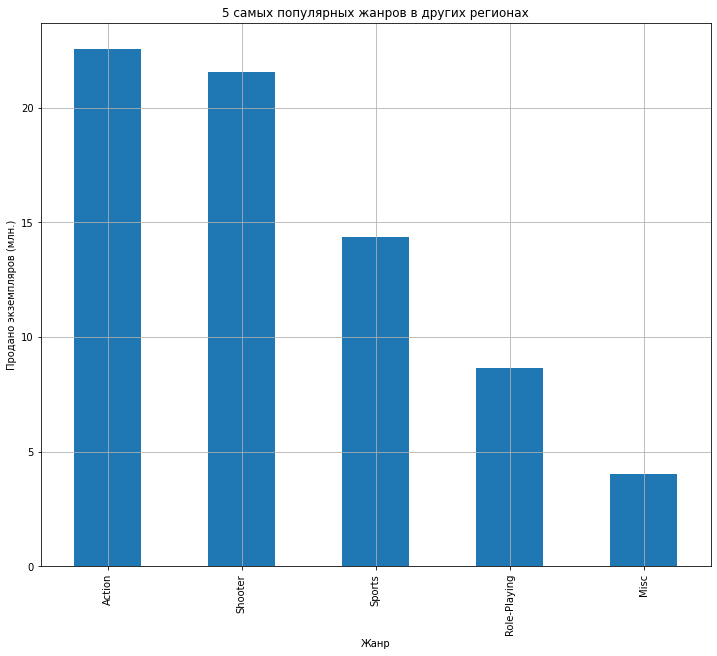

In [98]:
best_genres_other.plot(x = "genre", y = "other_sales", kind = "bar", figsize = (12, 10), grid = True, title = "5 самых популярных жанров в других регионах")
plt.xlabel("Жанр")
plt.ylabel("Продано экземпляров (млн.)")

Как видно из диаграмм, везде, за исключением Японии, лидируют жанры "Shooter" и "Action". Доля этих жанров значительно преобладает над остальными. Причём в Северной Америке преобладает "Shooter", а в Европе и всех остальных регионах, "Action".

================================================================================================

4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [99]:
rating_na = platform_sales.groupby("rating")["na_sales"].sum().sort_values(ascending = False)
rating_eu = platform_sales.groupby("rating")["eu_sales"].sum().sort_values(ascending = False)
rating_jp = platform_sales.groupby("rating")["jp_sales"].sum().sort_values(ascending = False)
rating_other = platform_sales.groupby("rating")["other_sales"].sum().sort_values(ascending = False)

<AxesSubplot:title={'center':'Рейтинг ESRB для Северной Америки'}, xlabel='rating'>

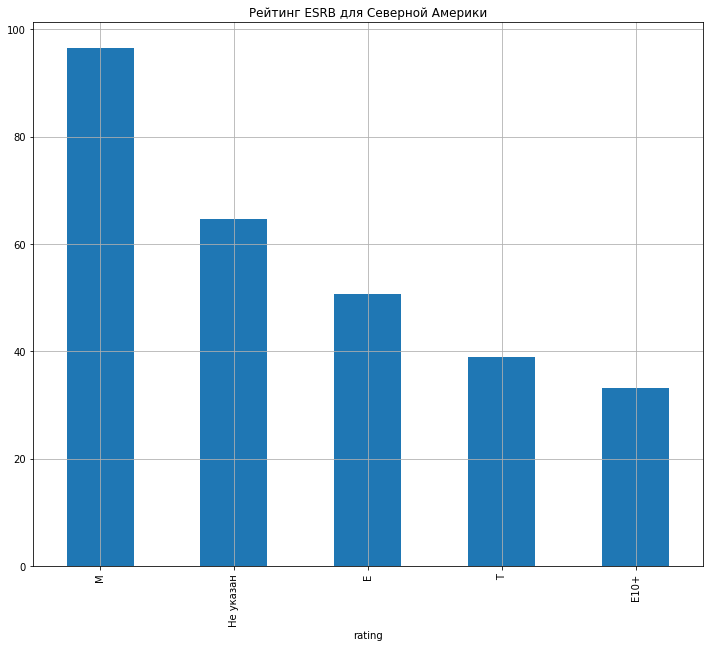

In [100]:
rating_na.plot(x = "rating", y = "na_sales", kind = "bar", figsize = (12, 10), grid = True, title = "Рейтинг ESRB для Северной Америки")

<AxesSubplot:title={'center':'Рейтинг ESRB для Европы'}, xlabel='rating'>

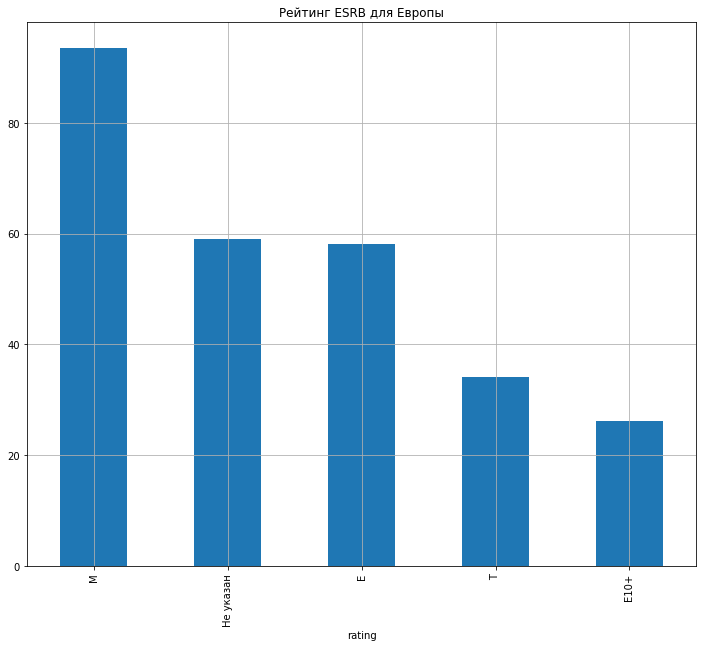

In [101]:
rating_eu.plot(x = "rating", y = "eu_sales", kind = "bar", figsize = (12, 10), grid = True, title = "Рейтинг ESRB для Европы")

<AxesSubplot:title={'center':'Рейтинг ESRB для Японии'}, xlabel='rating'>

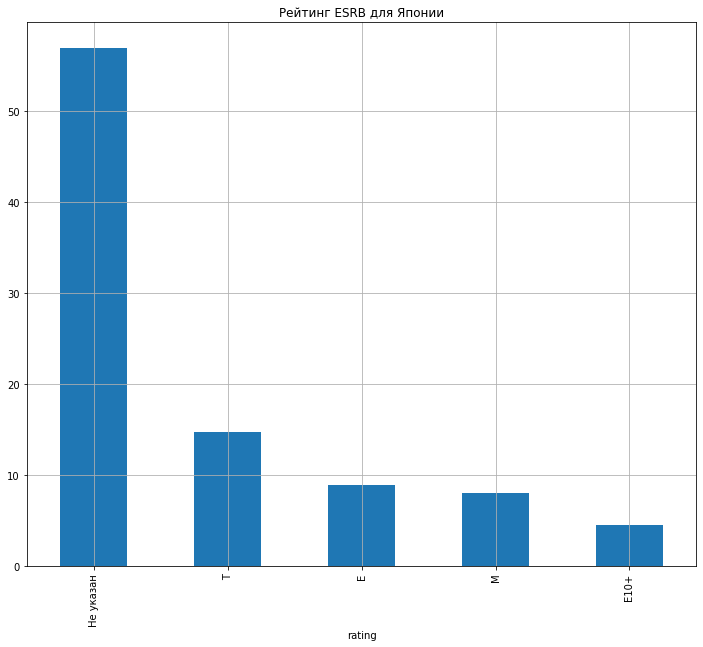

In [102]:
rating_jp.plot(x = "rating", y = "jp_sales", kind = "bar", figsize = (12, 10), grid = True, title = "Рейтинг ESRB для Японии")

<AxesSubplot:title={'center':'Рейтинг ESRB для других регионов'}, xlabel='rating'>

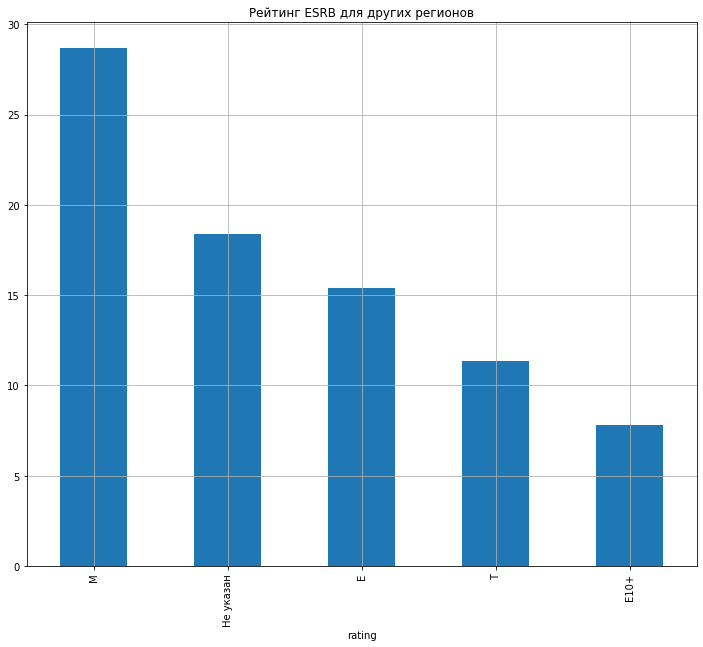

In [103]:
rating_other.plot(x = "rating", y = "other_sales", kind = "bar", figsize=(12, 10), grid = True, title = "Рейтинг ESRB для других регионов")

Как видно из графиков, везде лидируют игры с рейтингом "М" ("Для возрослых"), что логично, т.к. игроков этой категории больше и игр с таким рейтингом выпускается больше. Остальные рейтинги заметно ниже. Исключение состаляет Япония, где большинство составляют игры с неуказанным рейтингом, а другие распределены иначе, чем в других регионах.

**5. Проверка гипотез.**

В данном случае мы имеем несколько примерно равных совокупностей и нам нужно выяснить равенство средних показателей этих совокупностей. Для этого применим метод проверки гипотезы о равенстве среднего двух генеральных совокупностей.

5.1.

Гипотезы сформулируем следующим образом:

Гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые.

In [104]:
from scipy import stats as st
import numpy as np

In [105]:
platform_x_one = platform_sales[platform_sales["platform"] == "XOne"]
platform_pc = platform_sales[platform_sales["platform"] == "PC"]

In [106]:
x_one = platform_x_one["user_score"]
pc = platform_pc["user_score"]

In [107]:
x_one = x_one.dropna()
pc = pc.dropna()

In [108]:
alpha = 0.05
results = st.ttest_ind(x_one, pc)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Гипотеза H0 остаётся.

5.2.

Тут метод аналогичный.

Гипотеза H0: Средние пользовательские рейтинги жанров "Action" и "Sports" одинаковые.

Гипотеза H1: Средние пользовательские рейтинги жанров "Action" и "Sports" разные.

In [109]:
genre_аction = platform_sales[platform_sales["genre"] == "Action"]
genre_sports = platform_sales[platform_sales["genre"] == "Sports"]

In [110]:
аction = genre_аction["user_score"]
sports = genre_sports["user_score"]

In [111]:
аction = аction.dropna()
sports = sports.dropna()

In [112]:
alpha = 0.05
results = st.ttest_ind(аction, sports)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Есть основания отвергнуть гипотезу H0.

Средние пользовательские рейтинги по жанрам и по платформам.

In [113]:
x_one_rating = platform_sales[(platform_sales["platform"] == "XOne") & (platform_sales["user_score"] > 0)]["user_score"].mean()
pc_rating = platform_sales[(platform_sales["platform"] == "PC") & (platform_sales["user_score"] > 0)]["user_score"].mean()
print ("Средний пользовательский рейтинг XOne:", x_one_rating)
print ("Средний пользовательский рейтинг XOne:", pc_rating)

Средний пользовательский рейтинг XOne: 6.594545454545456
Средний пользовательский рейтинг XOne: 6.298360655737705


In [114]:
аction_rating = platform_sales[(platform_sales["genre"] == "Action") & (platform_sales["user_score"] > 0)]["user_score"].mean()
sports_rating = platform_sales[(platform_sales["genre"] == "Sports") & (platform_sales["user_score"] > 0)]["user_score"].mean()
print ('Средний пользовательский рейтинг жанра "Action":', аction_rating)
print ('Средний пользовательский рейтинг жанра "Sports":', sports_rating)

Средний пользовательский рейтинг жанра "Action": 6.760606060606061
Средний пользовательский рейтинг жанра "Sports": 5.2251968503937


**Вывод.**

Для анализа прогноза на 2017 г. был взят период с 2014 г. по 2016 г. включительно. На основании проведённого исследования, можно сделать следующие выводы:

Продажи в указанный период были в целом, примерно, одинаковы. В 2016 г. наметилась тенденция к их снижению, но это может быть обусловлено неполными данными за этот год.

У всех платформ на протяжении указанного периода снижались продажи. Исключение составляют "PS4" и "XOne", у которых был уверенный рост продаж, но которые также показали снижение в 2016 г.

Платформы "PS4" и "XOne" являются наиболее популярными во всех странах за исключением Японии. Именно их средние показатели являются самыми высокими. На основании изложенного можно сделать вывод, что данные платформы являются наиболее перспективными.

Среди жанров самыми популярными являются "Shooter", "Action" и "Sports". Именно они в разных вариантах лидируют во всех странах кроме Японии. Наименее популярными оказались игры в жанре "Adventure" и "Puzzle". Преобладают игры с рейтингом "М" ("Для взрослых").

Также стоит отметить, что оценки критиков и игроков оказывают очень слабое влияние на продажи игр. Если же сравнивать только эти показатели, то оценки критиков оказывают большее влияние, чем оценки игроков.

Подводя итог можно сказать, что при планировании кампании на 2017 год следует обратить особое внимание на игры жанров "Shooter", "Action" и "Sports" с рейтингом "М". Из платформ рекомендуется выбрать "PS4" и "XOne". Что касается регионов, то следует акценировать внимание на Северной Америке и Европе, т.к это наиболее ёмкий рынок и именно в них указанные жанры с соответствующим рейтингом и на указанных платформах составляют большинство. Что касается Японии, то её рынок специфичен и для его оценки мало данных.